In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
import pylab as pl
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
df =pd.DataFrame(data)

In [111]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [112]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [113]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# feature selection with lasso 

In [114]:
x = df.drop(columns=['output'])
y = df['output'].values.reshape(-1,1)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state =0)


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [116]:
# using gridsearchcv to find the best "alpha" for lasso regression


lasso_model = Lasso()

kf = KFold(n_splits =10, shuffle =True, random_state = 0)

params = {"alpha": np.arange(0.0000000001, 100, 5)}

lasso_cv = GridSearchCV(lasso_model, param_grid = params, cv = kf)

lasso_cv.fit(x_train_scaled,y_train)

print(f"The best Param is {lasso_cv.best_params_}")

The best Param is {'alpha': 1e-10}


In [245]:
# lasso regression with alpha = 1.e-10 whish the best alpha

best_lasso_model = Lasso(alpha = 1e-10)

best_lasso_model.fit(x_train_scaled, y_train.ravel())

Lasso(alpha=1e-10)

In [246]:
# the coefficient of each feature with lasso regression model

best_lasso_model_coef = np.abs(best_lasso_model.coef_)

In [247]:
best_lasso_model_coef

array([0.00918691, 0.10667397, 0.10941709, 0.02896317, 0.02002428,
       0.01589204, 0.00758349, 0.06842564, 0.07423251, 0.07709114,
       0.01880262, 0.12160584, 0.05819717])

In [248]:
data_columns = df.drop(columns=['output'],axis = 1)

In [249]:
feature_name = data_columns.columns
feature_name

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [250]:
# Features with non-zero coefficient

feature_subset=np.array(feature_name)[best_lasso_model_coef != 0]
print(f"Selected Feature Columns: {feature_subset}")

Selected Feature Columns: ['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']


In [251]:
# In the datarame above the features are sorted by coefficient.

data = {'feature': feature_name, 'coeff': best_lasso_model_coef}

dict_feature_coeff = pd.DataFrame(data)

In [252]:
dict_feature_coeff_sorted = dict_feature_coeff.sort_values(by= 'coeff', ascending = False, ignore_index = True)
dict_feature_coeff_sorted 

,feature,coeff
0,caa,0.121606
1,cp,0.109417
2,sex,0.106674
3,oldpeak,0.077091
4,exng,0.074233
5,thalachh,0.068426
6,thall,0.058197
7,trtbps,0.028963
8,chol,0.020024
9,slp,0.018803


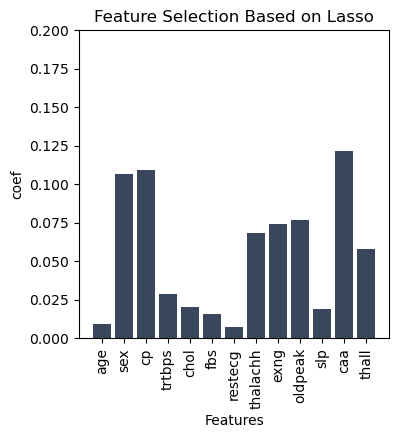

In [253]:
# plotting the Column Names and Importance of Columns.
plt.figure(figsize=(4,4))
plt.bar(feature_name, best_lasso_model_coef, color = '#3a465c')
plt.xticks(rotation=90)
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("coef")
plt.ylim(0, 0.2)
plt.show()

As you can see the coefficient of non o them is non zero. So, with all of them the model has good performance and non of them can be removed.

# lassocv and lasso path

To show the lasso regression model performance lassocv and lasso path can be employed.

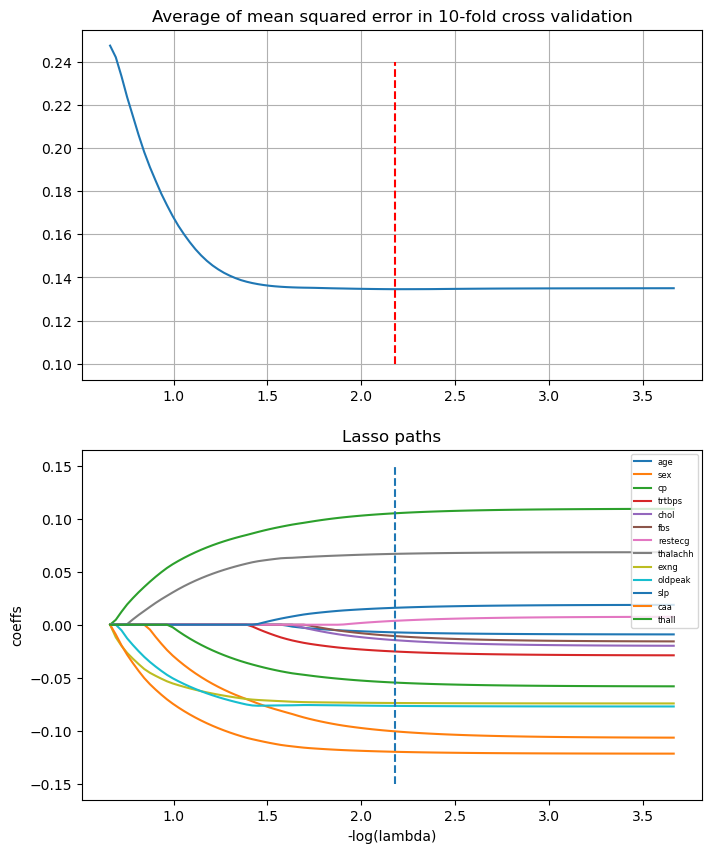

In [264]:
x = df.drop(columns=['output'])
y = df['output'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state =0)


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)


############################### lassocv (mse and lambda) ################################################


eps = 1e-3 # the smaller it is the longer is the path


model = LassoCV(eps=eps).fit(x_train_scaled, y_train.ravel())


############################## Display results ################################################


m_log_alphas = -np.log10(model.alphas_)
m_log_alpha = -np.log10(model.alpha_)

x_list=[]

ymin, ymax = 0.1, 0.24


for j in range(100):
    
    x_list.append(m_log_alphas[j])
    
    
    
ave_list = []

for i in range(len(model.alphas_)):
    
    k_fold_mse = model.mse_path_
    mean_mse = k_fold_mse[i].mean()
    
    ave_list.append(mean_mse)
    
    
    
fig, axs = plt.subplots(2, 1, figsize=(8,10))    


axs[0].plot(x_list, ave_list)              
axs[0].vlines([m_log_alpha], ymin, ymax, linestyle='dashed', color='red')


axs[0].set_title('Average of mean squared error in 10-fold cross validation')
axs[0].grid()
plt.ylabel('MSE')
plt.axis('tight')




####################################### lasso path (coeff and lambda) #########################################

alphas, coef_path, _  = lasso_path(x_train_scaled, y_train, alphas = model.alphas_)


m_log_alphas = -np.log10(alphas)
m_log_alpha = -np.log10(model.alpha_)

ax = plt.gca()


for i in range(len(feature_name)):
    
    axs[1].plot(m_log_alphas, coef_path[0][i],label = feature_name[i])
    
    

ymin, ymax = -0.15 , 0.15



axs[1].vlines([m_log_alpha], ymin, ymax, linestyle='dashed')

plt.legend(fontsize = 6)
plt.xlabel('-log(lambda)')
plt.ylabel('coeffs')
plt.title('Lasso paths')
plt.axis('tight')



plt.show()

Again! we can see that at -log(lambda) = 2.3 the model model performes good (MSE =0.14) at which the coefficient of neither of feature shrinke toward zero.

In [4]:
x = df.drop(columns=['output'])
y = df['output'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state =0)


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)


############################### lassocv (mse and lambda) ################################################


eps = 1e-3 # the smaller it is the longer is the path


model = LassoCV(eps=eps).fit(x_train_scaled, y_train.ravel())


############################## Display results ################################################


m_log_alphas = -np.log10(model.alphas_)
m_log_alpha = -np.log10(model.alpha_)

In [8]:
x = model.mse_path_
x[0].mean()

0.2474177814700418

In [9]:
ave_list = []

for i in range(len(model.alphas_)):
    
    k_fold_mse = model.mse_path_
    mean_mse = k_fold_mse[i].mean()
    
    ave_list.append(mean_mse)
               

In [11]:
len(ave_list)
               

100